In [244]:
import functions

import numpy as np
import pandas as pd
import importlib
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress


importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

In [245]:

excel_folder_path = "data/"
FM_folder_path = "data/Raw_MissingDataImputed/"
regression_info, rsfMRI_full_info = functions.load_excel_data(excel_folder_path, FM_folder_path)
folder_path = "FC_matrices_times_wp11/"

rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]
rois_sub = rois
rois_full = np.arange(0, 379)
selected_rois = [362, 363, 364, 367, 371, 372, 373, 376]

striatum_labels = [
    'Caudate_ipsi', 'Putamen_ipsi', 'Caudate_contra', 'Putamen_contra', 'Pallidum_ipsi', 'Pallidum_contra', 
    'Accumbens_ipsi', 'Accumbens_contra'
]
# Step 1: Filter regression info to T1 and matching conditions
regression_T3 = regression_info[
    (regression_info["TimePoint"] == "T3") &
    (regression_info["Behavioral_assessment"] == 1) &
    (regression_info["MRI"] == 1)
].copy()

Trying to load: TiMeS_matrix_mdImputed_allT4.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT4.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT3.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT3.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT2.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT2.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT1.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT1.xlsx


In [246]:
all_matrices, all_subjects, yeo_mat_all_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='all', plot=False)
t1_t3_t4_matched = all_matrices.copy().dropna(subset=['T1_matrix', 'T3_matrix', 'T4_matrix'])

roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path


df_aligned = functions.switch_contra_ipsi_df(
    t1_t3_t4_matched,  
    tp=3, 
    rois=rois,
    roi_mapping=roi_mapping
)

df_aligned = df_aligned.merge(t1_t3_t4_matched[['subject_id', 'Lesion_side']], on='subject_id', how='left')

# T3 whole group

## fmi pearson

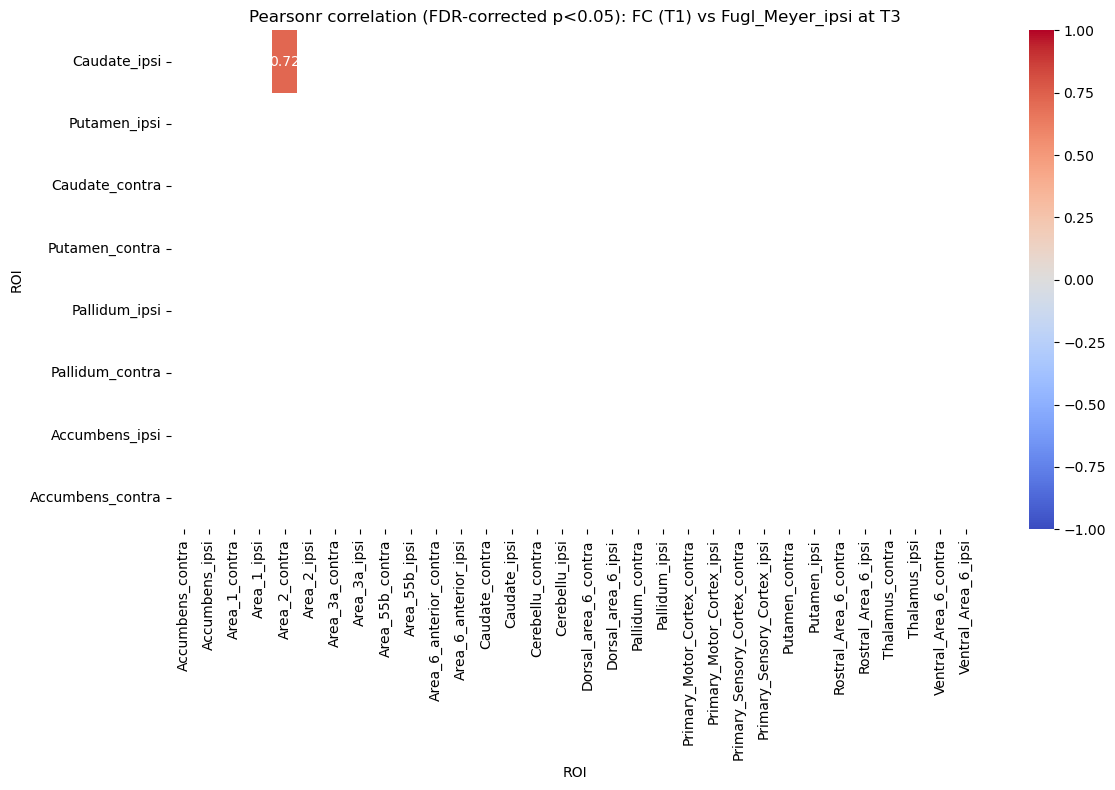

In [247]:
corr, pval, pval_corrected = functions.motor_correlation(
    df_aligned,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    
    mask_significant_only=True     
)

import matplotlib.pyplot as plt

In [248]:
# Extract Caudate_ipsi x Area2_contra values from the T1_matrix DataFrames for all subjects
caudate_ipsi_area2_contra = df_aligned["T1_matrix"].apply(lambda mat: mat.loc["Caudate_ipsi", "Area_2_contra"] if mat is not None else np.nan).to_numpy()
regression_T3 = regression_info[regression_info["TimePoint"] == "T3"]

Pearson r = 0.723, p = 0.000


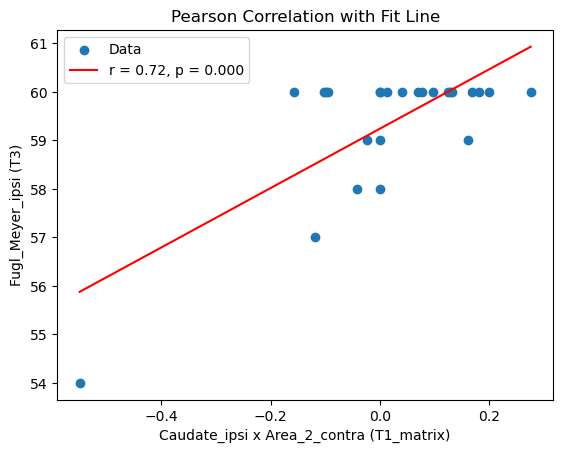

In [249]:
functions.check_corr(df_aligned, regression_T3, region1="Caudate_ipsi", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=3, corr_type='pearsonr')

Even though there is a plateau, we see something !! => but unaffected hand ...

Pearson r = 0.387, p = 0.083


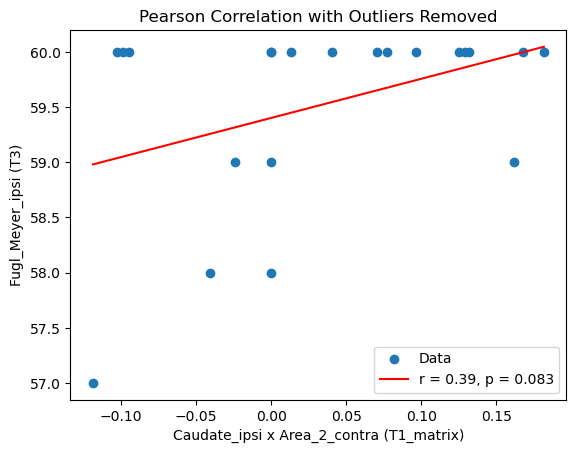

(0.38666317804551636, 0.08336289618976007)

In [250]:
functions.check_corr_cleaned(df_aligned, regression_T3, region1="Caudate_ipsi", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=3, corr_type='pearsonr')

## nmf motor spearman 

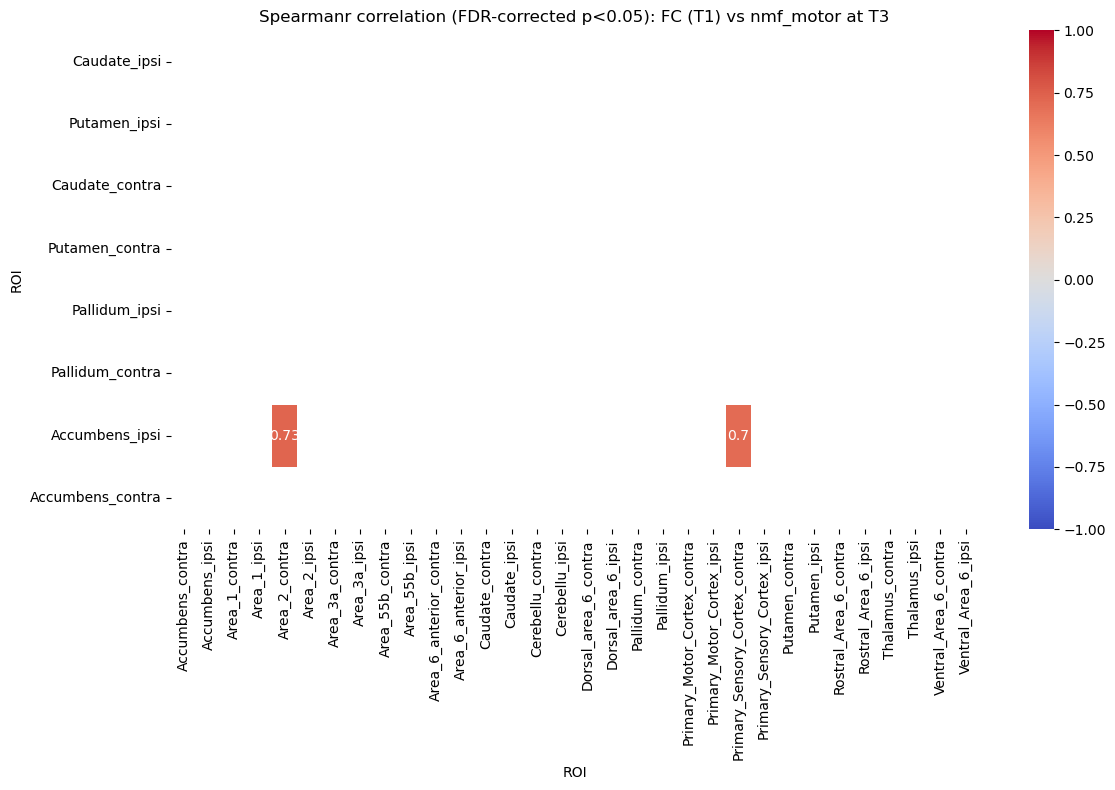

In [251]:
corr, pval, pval_corr = functions.motor_correlation(
    df_aligned,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

Spearman r = 0.728, p = 0.000


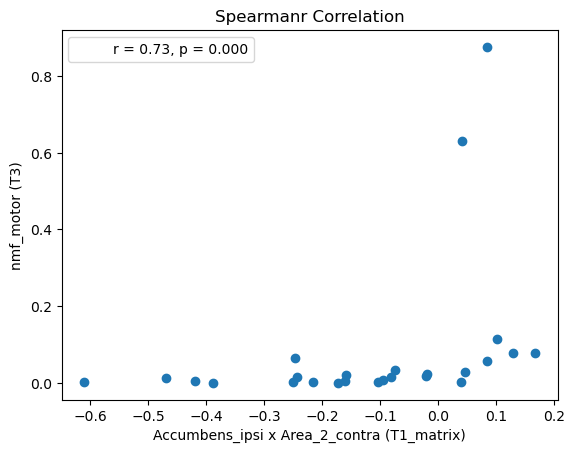

Spearman r = 0.666, p = 0.001


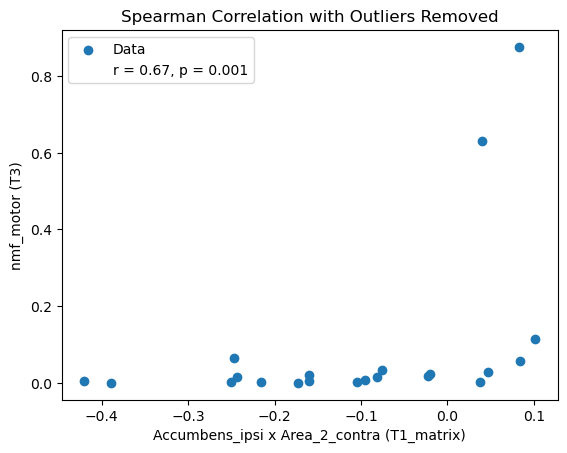

(0.6662337662337662, 0.0009757283731243881)

In [252]:
functions.check_corr(df_aligned, regression_T3, "Accumbens_ipsi", "Area_2_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned, regression_T3, "Accumbens_ipsi", "Area_2_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')


Spearman r = 0.705, p = 0.000


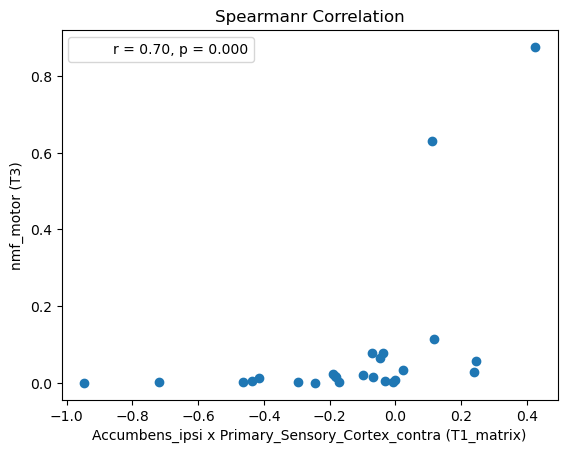

Spearman r = 0.558, p = 0.009


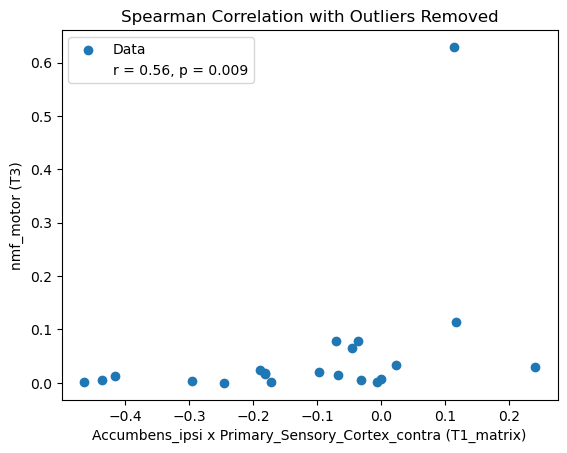

(0.5584415584415584, 0.008510101872800194)

In [253]:
functions.check_corr(df_aligned, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

# T4 whole group

In [254]:
regression_T4 = regression_info[
    (regression_info["TimePoint"] == "T4") &
    (regression_info["Behavioral_assessment"] == 1) &
    (regression_info["MRI"] == 1)
]

## FMI

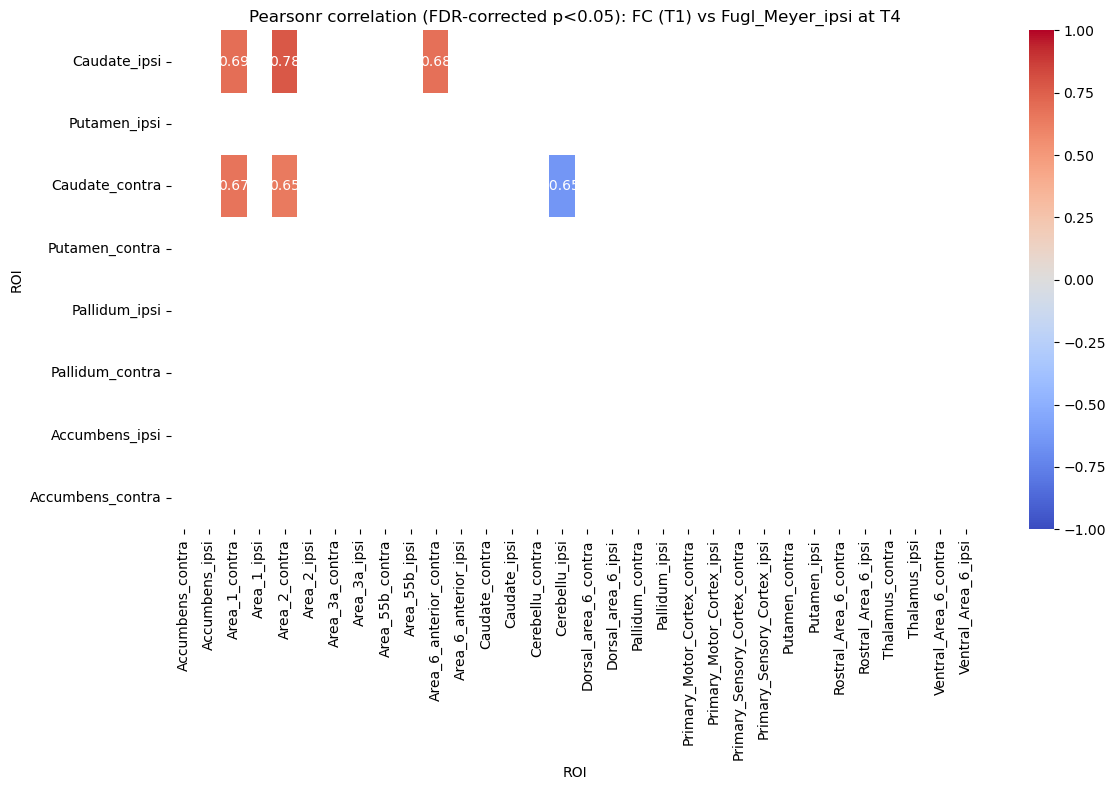

In [255]:
corr, pval, pval_corr = functions.motor_correlation(
    df_aligned,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

### Caudate ipsi

Pearson r = 0.694, p = 0.000


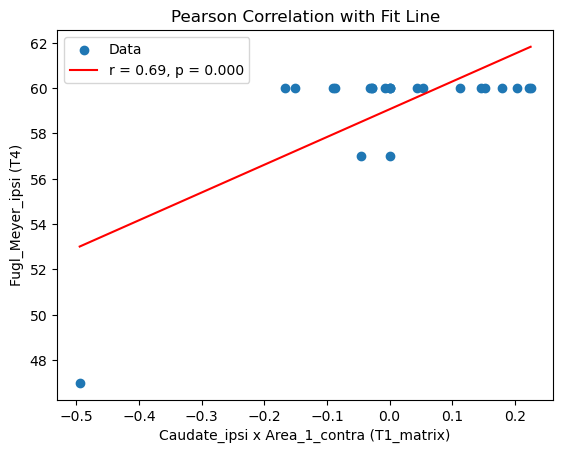

In [256]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_ipsi", region2="Area_1_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = 0.776, p = 0.000


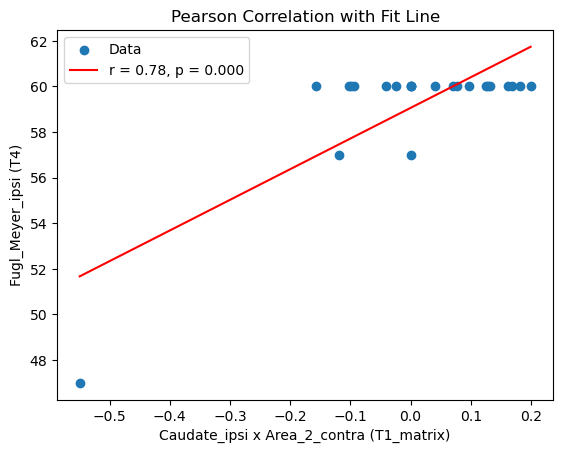

In [257]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_ipsi", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = 0.684, p = 0.000


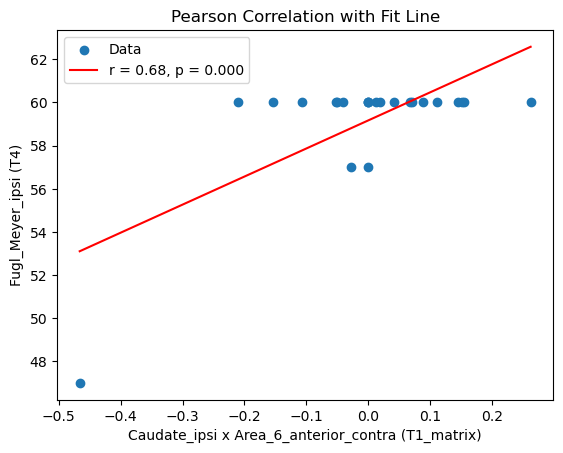

In [258]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_ipsi", region2="Area_6_anterior_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

### Caudate contra

Pearson r = 0.669, p = 0.000


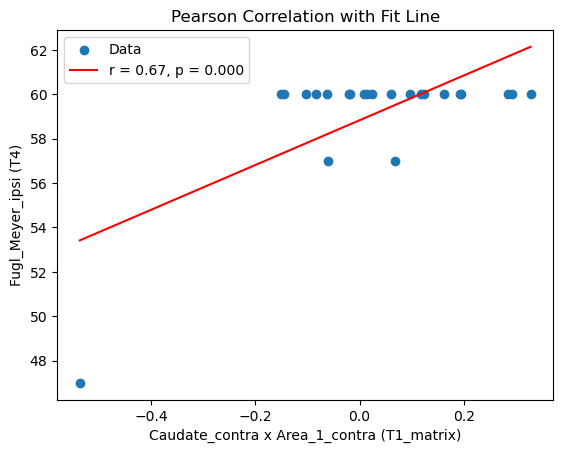

In [259]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_contra", region2="Area_1_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = 0.645, p = 0.001


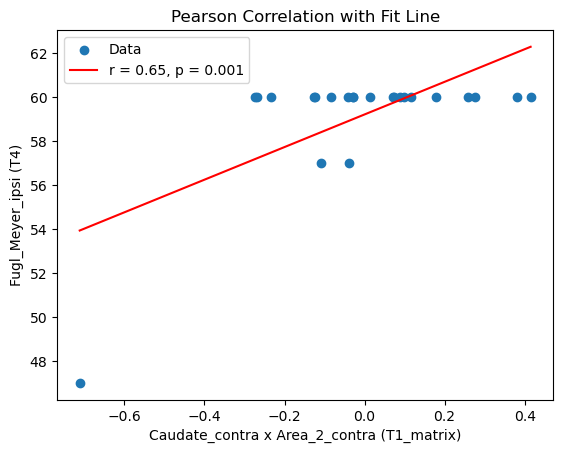

In [260]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_contra", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = -0.648, p = 0.001


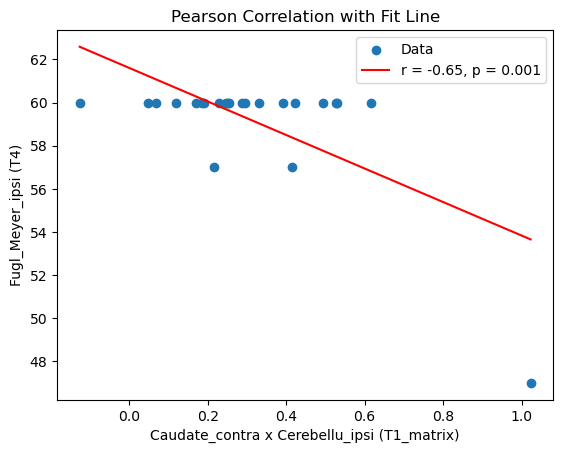

Pearson r = -0.052, p = 0.832


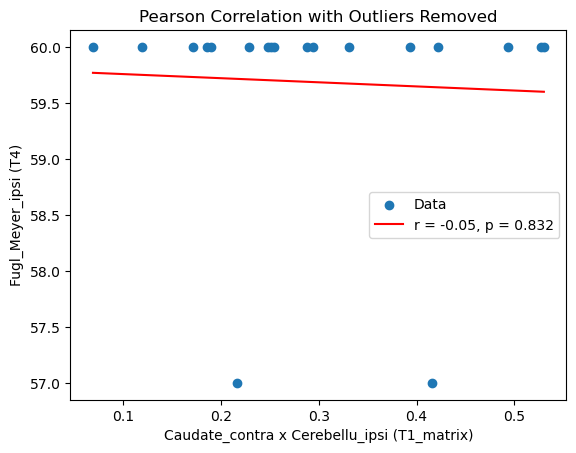

(-0.05227026313295688, 0.8317033603863174)

In [261]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_contra", region2="Cerebellu_ipsi", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')
functions.check_corr_cleaned(df_aligned, regression_T4, region1="Caudate_contra", region2="Cerebellu_ipsi", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

# T3 R

## FMC Pearson

In [262]:
df_aligned_L, df_aligned_R = functions.split_by_lesion_side(df_aligned)

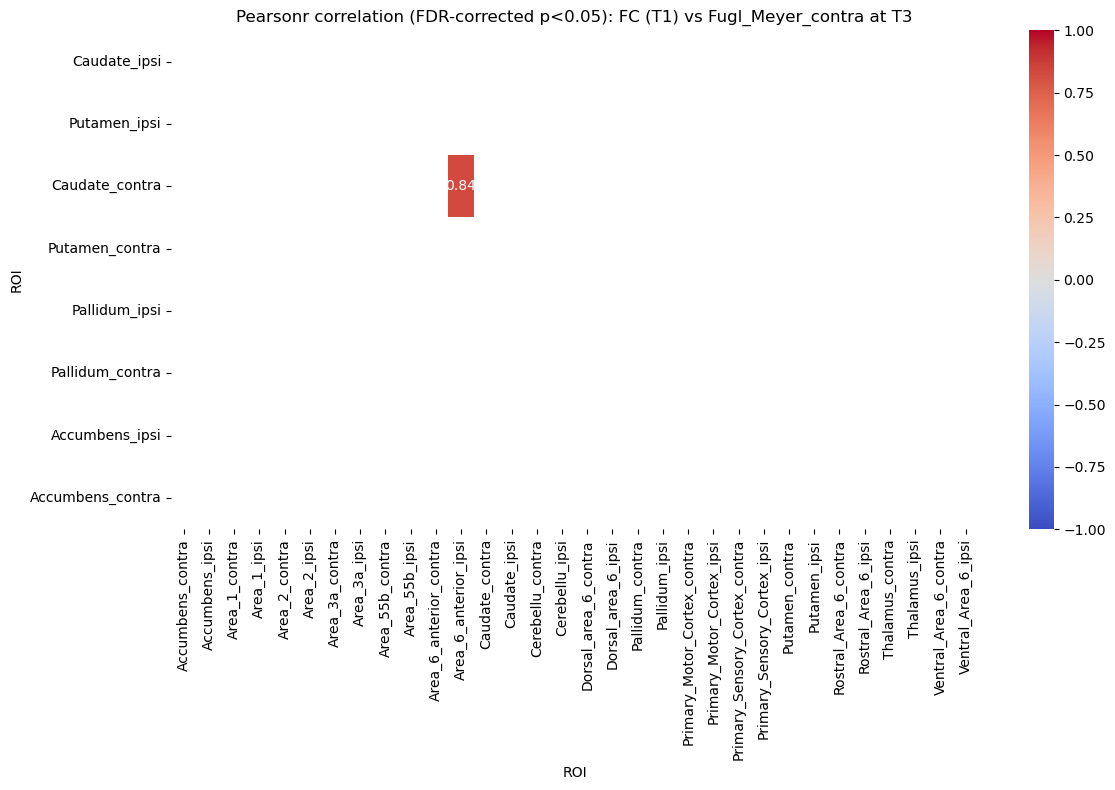

In [263]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

Pearson r = 0.835, p = 0.000


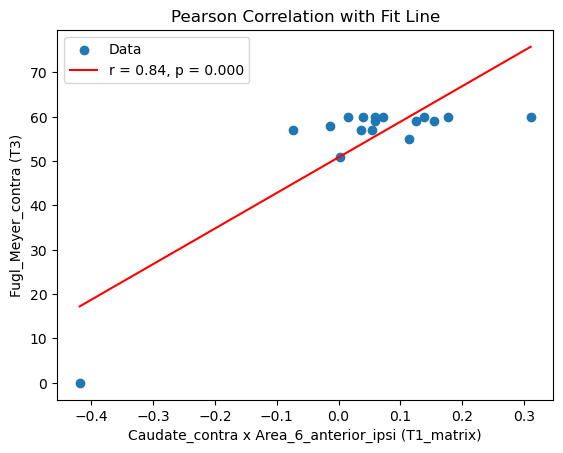

Pearson r = 0.350, p = 0.201


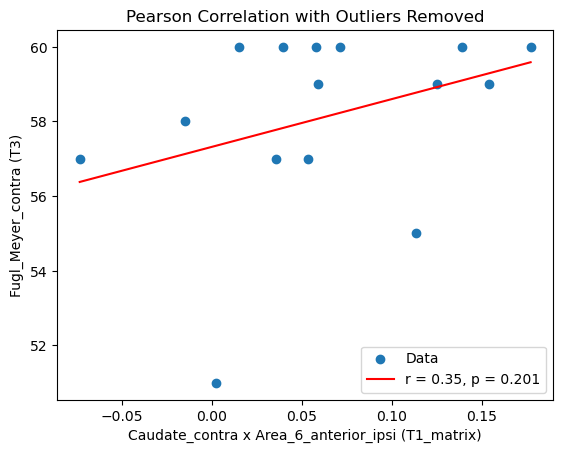

(0.35006803800970687, 0.20085178567807122)

In [264]:
functions.check_corr(df_aligned_R, regression_T3, "Caudate_contra", "Area_6_anterior_ipsi", tp=3, motor_test='Fugl_Meyer_contra', corr_type='pearsonr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Caudate_contra", "Area_6_anterior_ipsi", tp=3, motor_test='Fugl_Meyer_contra', corr_type='pearsonr')

## nmf Pearson

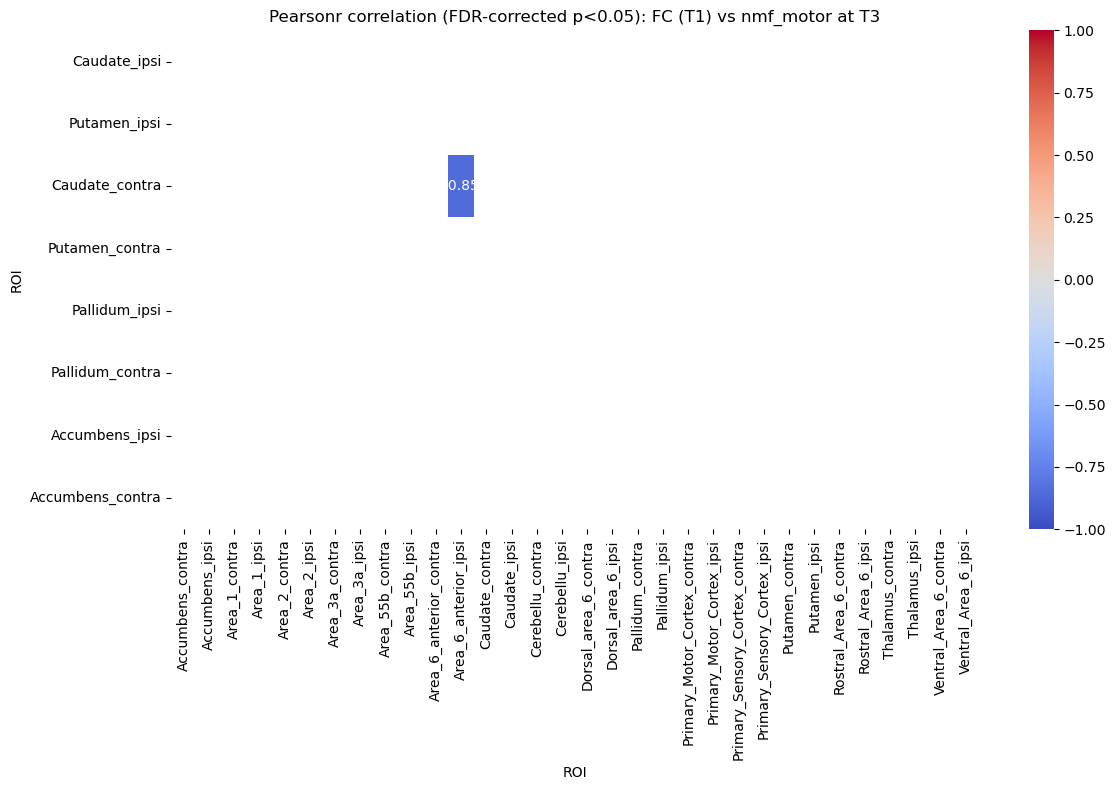

In [265]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

Pearson r = -0.852, p = 0.000


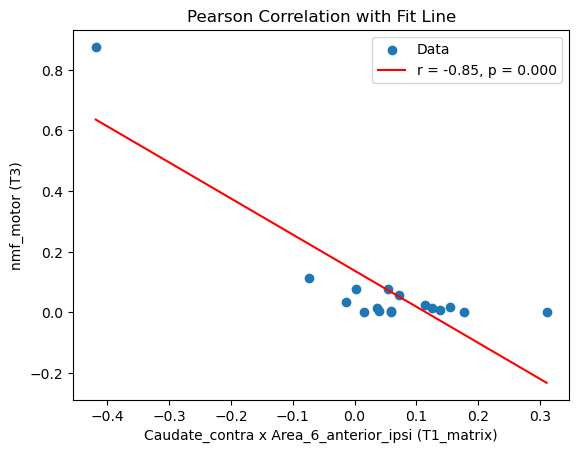

In [266]:
functions.check_corr(df_aligned_R, regression_T3, "Caudate_contra", "Area_6_anterior_ipsi", tp=3, motor_test='nmf_motor', corr_type='pearsonr')

Pearson r = -0.580, p = 0.023


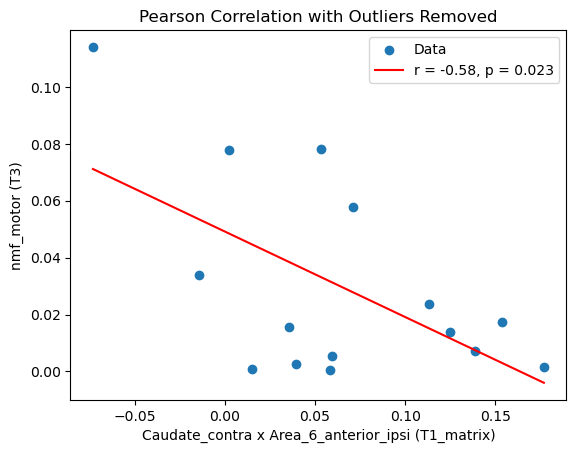

(-0.5802970624550418, 0.023333366240502227)

In [267]:
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Caudate_contra", "Area_6_anterior_ipsi", tp=3, motor_test='nmf_motor', corr_type='pearsonr')

## nmf spearman

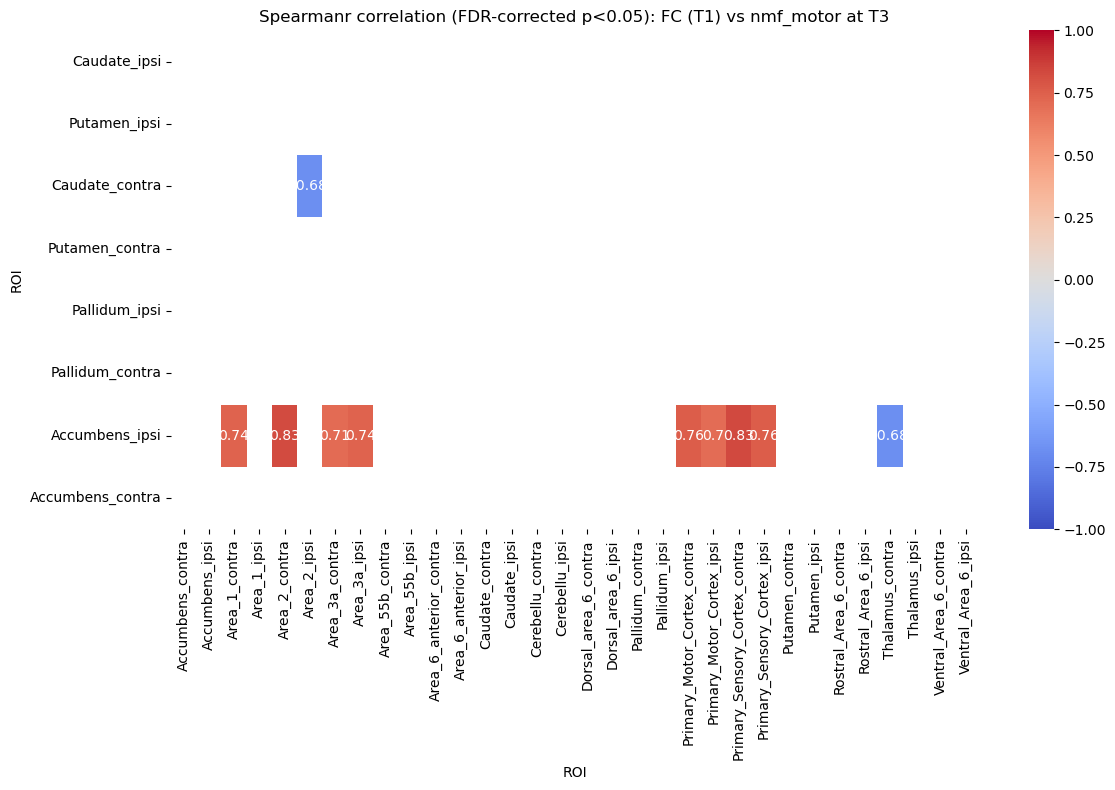

In [268]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

### caudate contra

Spearman r = -0.681, p = 0.003


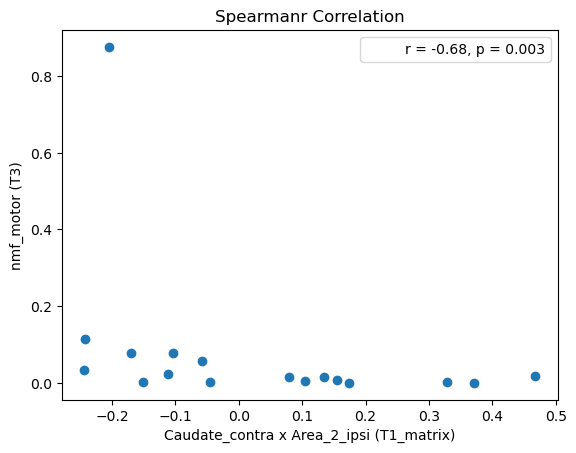

Spearman r = -0.775, p = 0.001


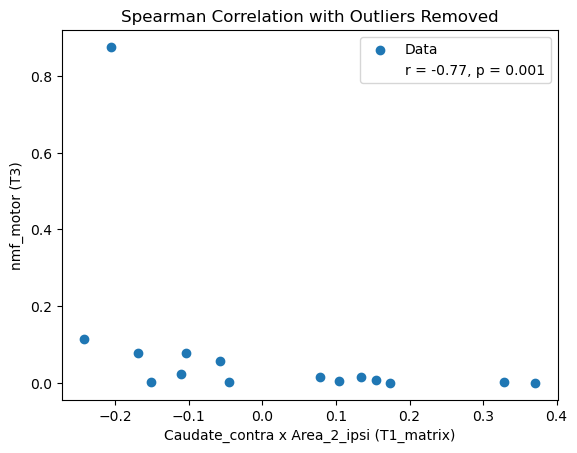

(-0.7749999999999999, 0.0006896453939514363)

In [269]:
functions.check_corr(df_aligned_R, regression_T3, "Caudate_contra", "Area_2_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Caudate_contra", "Area_2_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> bad !

Spearman r = 0.738, p = 0.001


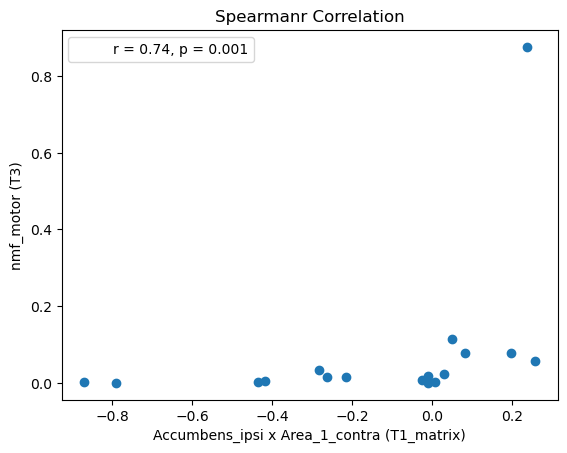

Spearman r = 0.689, p = 0.004


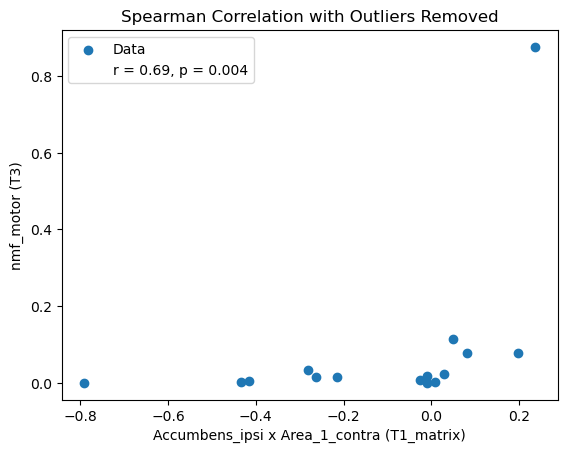

(0.6892857142857142, 0.0044737344509062)

In [270]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_1_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_1_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> also bad

Spearman r = 0.826, p = 0.000


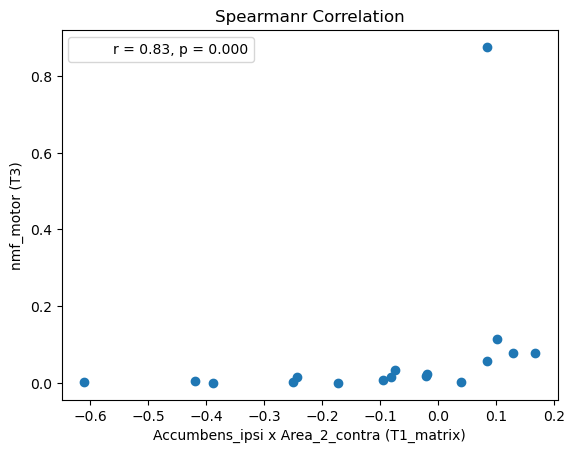

Spearman r = 0.796, p = 0.000


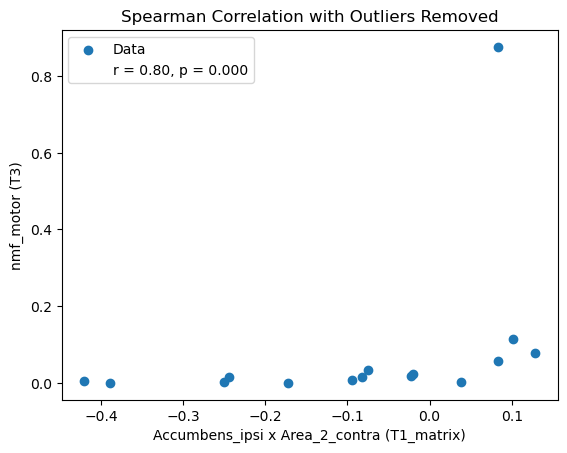

(0.7964285714285713, 0.00038046767853463354)

In [271]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_2_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_2_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> also bad

Spearman r = 0.711, p = 0.001


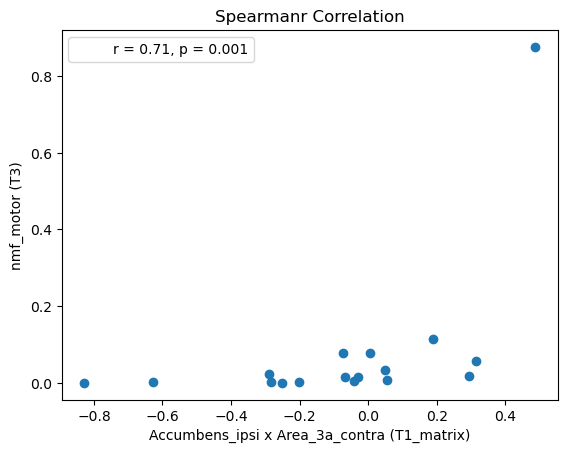

Spearman r = 0.593, p = 0.020


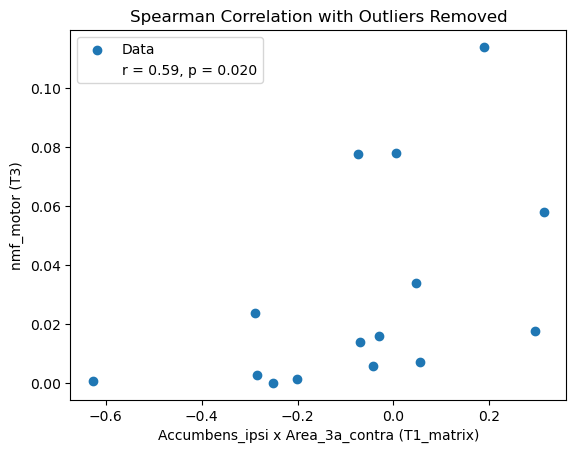

(0.5928571428571427, 0.01984642197018114)

In [272]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_3a_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_3a_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> better ?

Spearman r = 0.735, p = 0.001


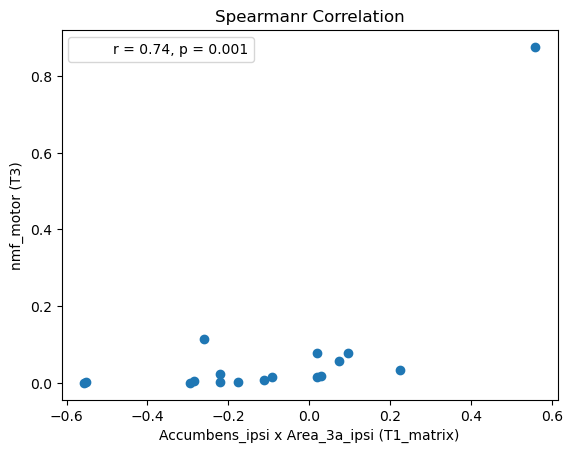

Spearman r = 0.621, p = 0.013


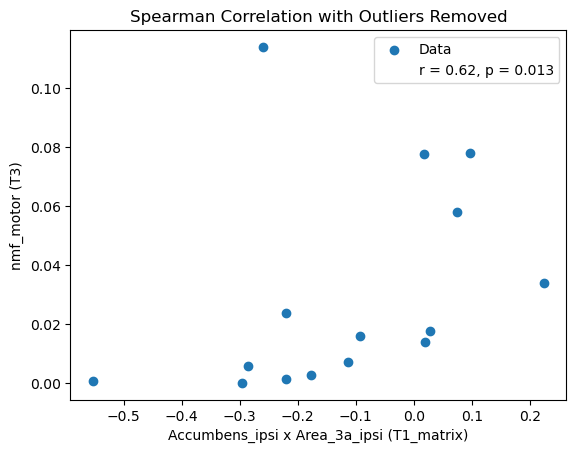

(0.6214285714285712, 0.013402006712181795)

In [273]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_3a_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_3a_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> better ?

Spearman r = 0.765, p = 0.000


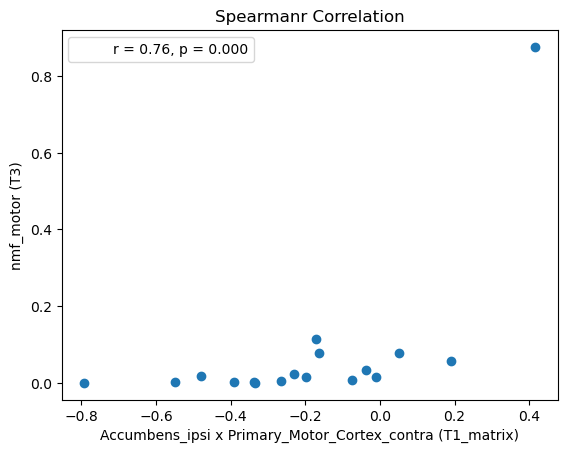

Spearman r = 0.675, p = 0.006


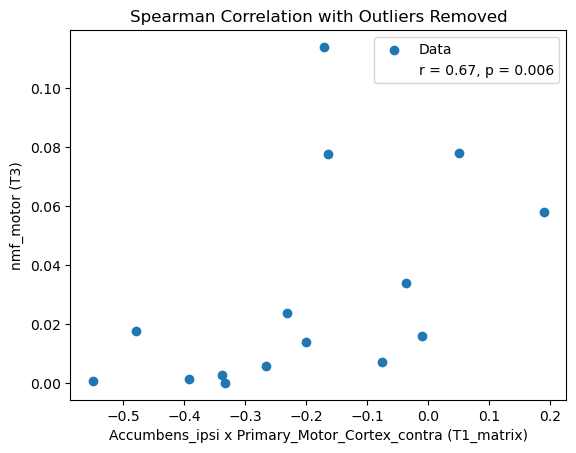

(0.6749999999999999, 0.00576349921805083)

In [274]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Motor_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Motor_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = 0.699, p = 0.002


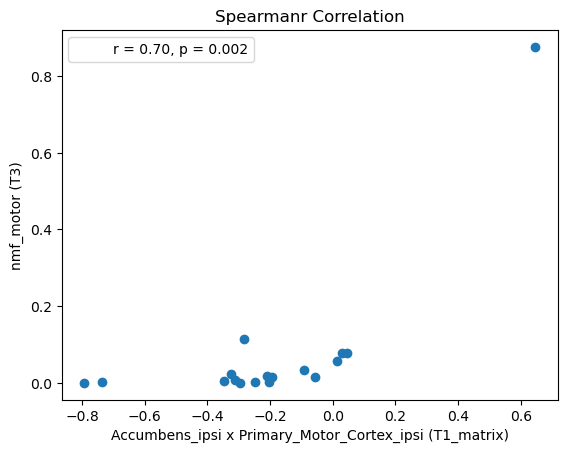

Spearman r = 0.579, p = 0.024


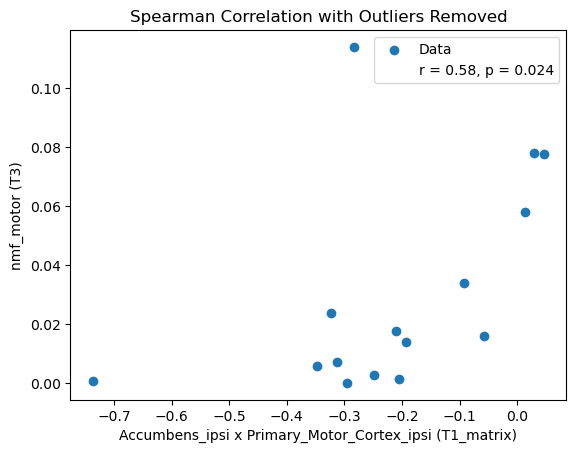

(0.5785714285714285, 0.02384665876299661)

In [275]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Motor_Cortex_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Motor_Cortex_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = 0.833, p = 0.000


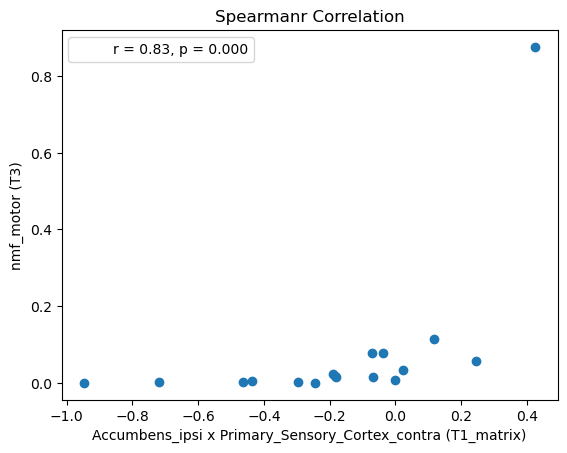

Spearman r = 0.775, p = 0.001


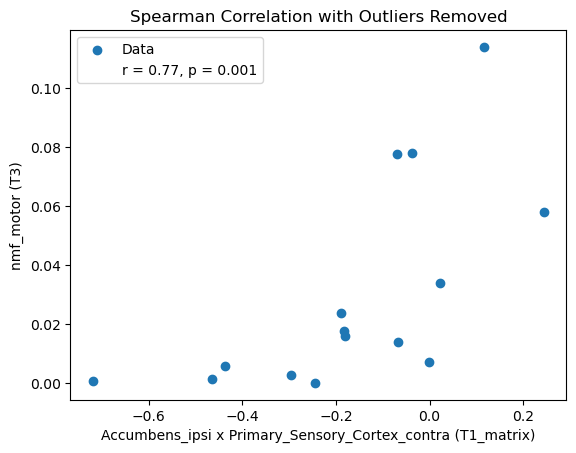

(0.7749999999999999, 0.0006896453939514363)

In [276]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = 0.760, p = 0.000


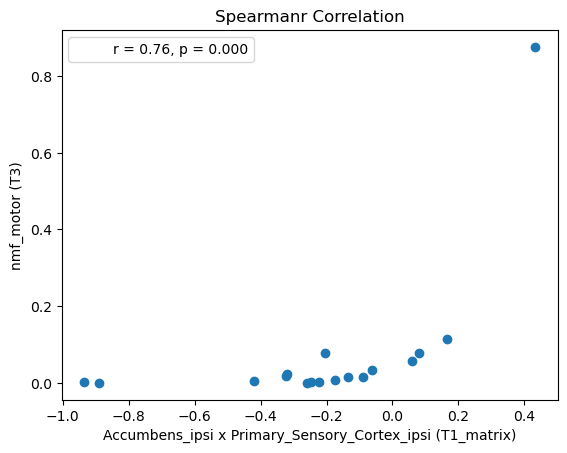

Spearman r = 0.671, p = 0.006


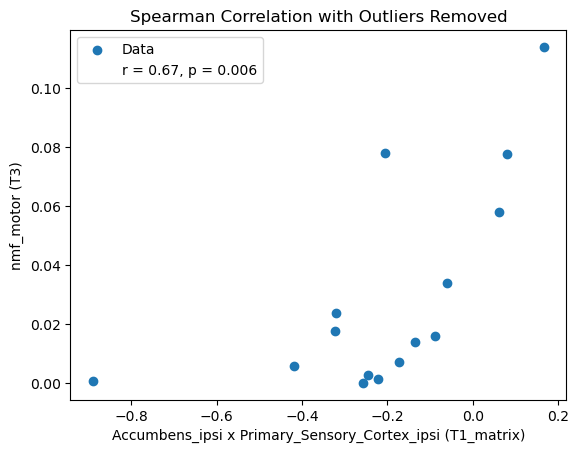

(0.6714285714285713, 0.0061277667888201)

In [277]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')


Spearman r = -0.684, p = 0.002


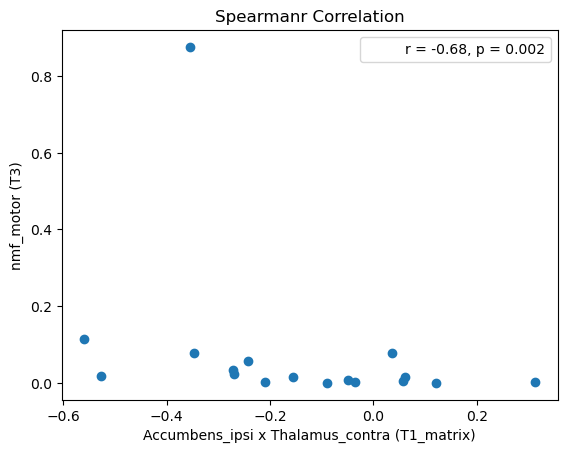

Spearman r = -0.575, p = 0.025


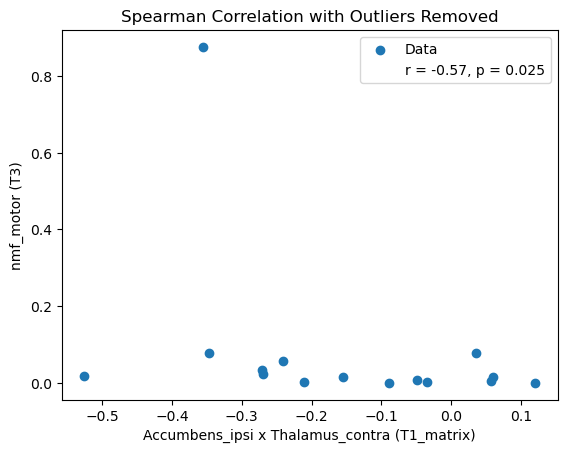

(-0.575, 0.024936227942582535)

In [278]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Thalamus_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')
functions.check_corr_cleaned(df_aligned_R, regression_T3, "Accumbens_ipsi", "Thalamus_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

hummmm

# T4 R

## FMI pearson

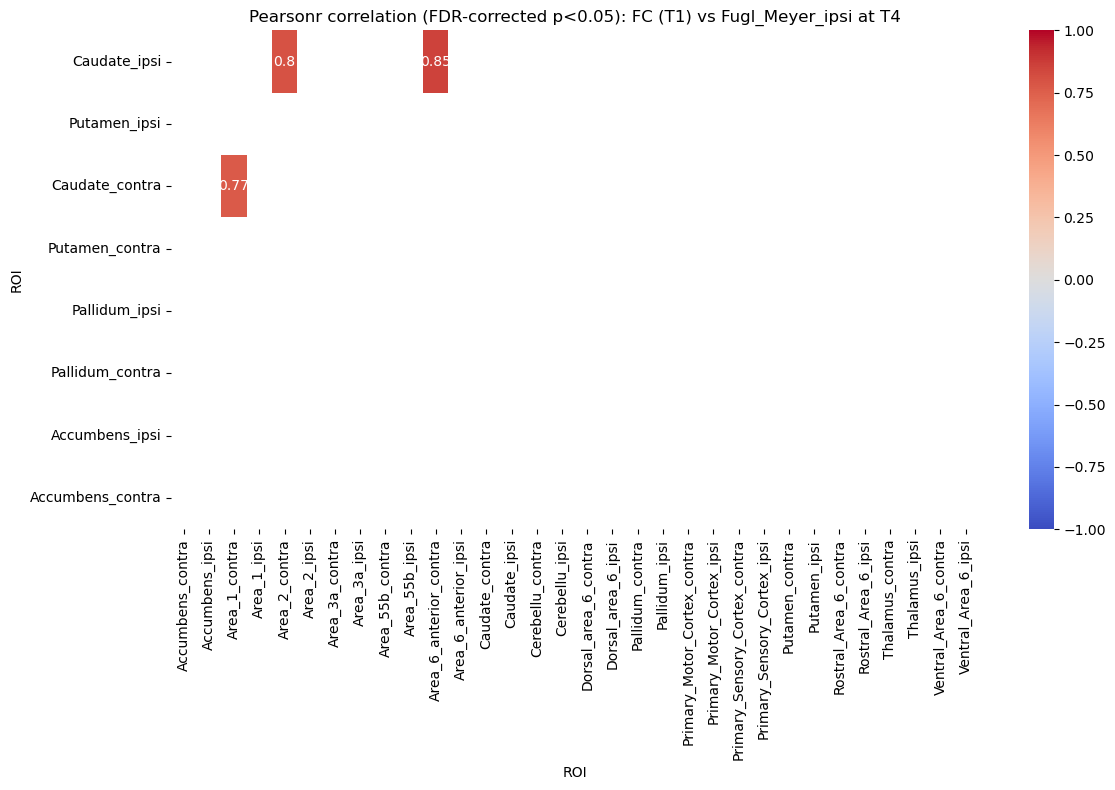

In [279]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

### caudate ipsi

Pearson r = 0.801, p = 0.000


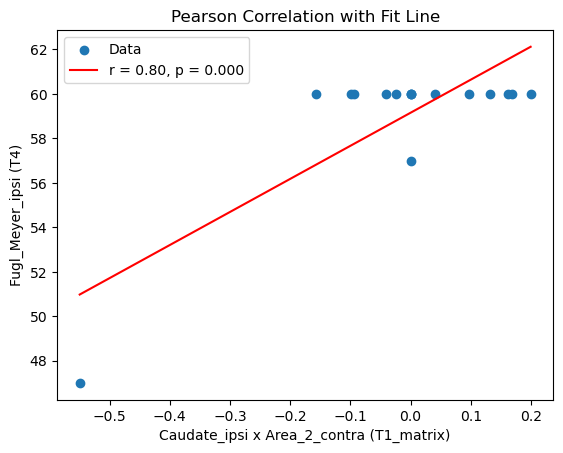

Pearson r = 0.038, p = 0.896


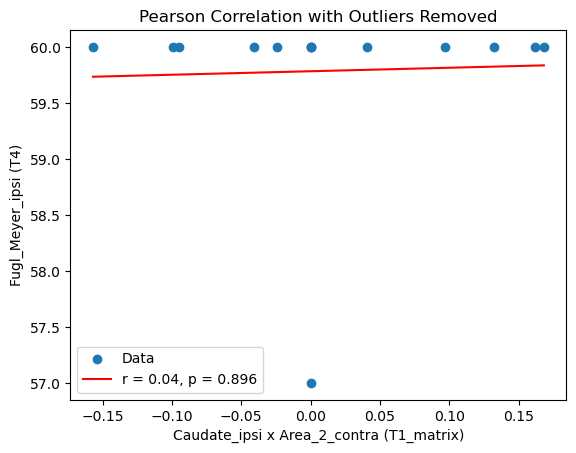

(0.03836632801064997, 0.8963954976062689)

In [280]:
functions.check_corr(df_aligned_R, regression_T4, "Caudate_ipsi", "Area_2_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')
functions.check_corr_cleaned(df_aligned_R, regression_T4, "Caudate_ipsi", "Area_2_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')


Pearson r = 0.855, p = 0.000


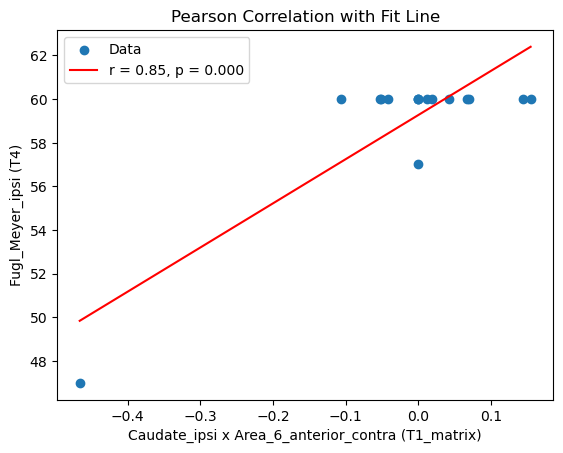

Pearson r = 0.035, p = 0.906


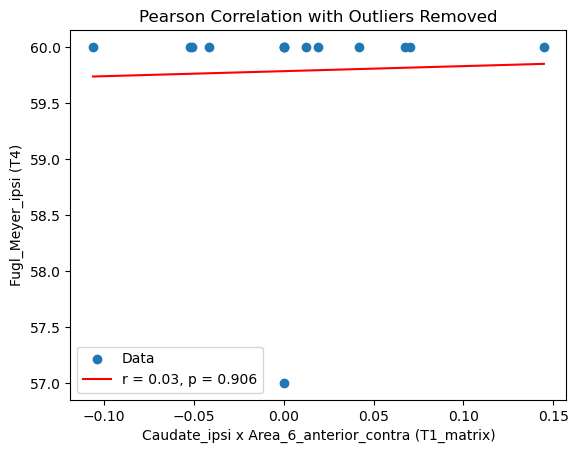

(0.03488723648845551, 0.905750457313155)

In [281]:
functions.check_corr(df_aligned_R, regression_T4, "Caudate_ipsi", "Area_6_anterior_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')
functions.check_corr_cleaned(df_aligned_R, regression_T4, "Caudate_ipsi", "Area_6_anterior_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')

### Caudate contra

Pearson r = 0.773, p = 0.000


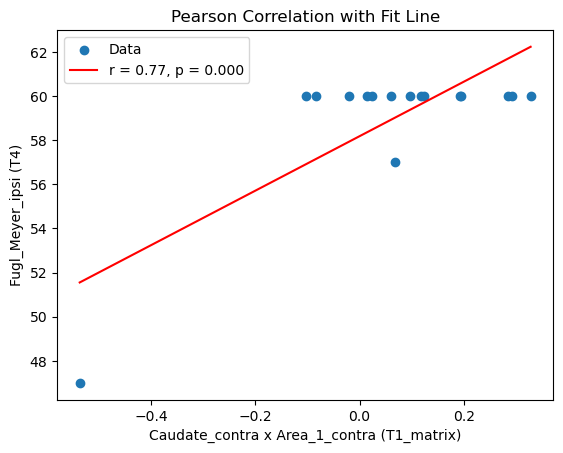

Pearson r = 0.051, p = 0.862


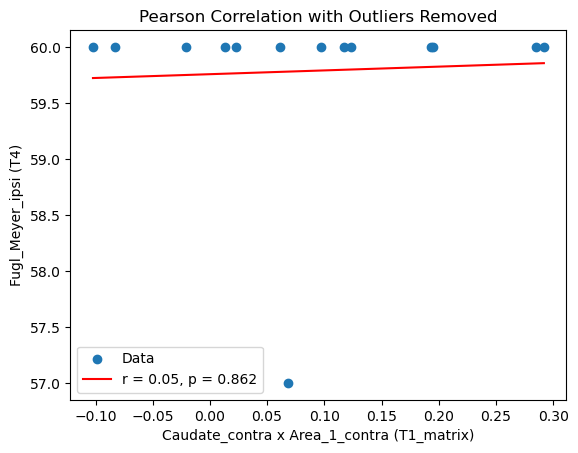

(0.05132883874041823, 0.8616594396954683)

In [282]:
functions.check_corr(df_aligned_R, regression_T4, "Caudate_contra", "Area_1_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')
functions.check_corr_cleaned(df_aligned_R, regression_T4, "Caudate_contra", "Area_1_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')

# Homotopy

In [283]:
homotopic_pairs = [(363, 372), (364, 373), (365, 374), (368, 377), (361, 370), (362, 371), (12, 192), (54, 234), (56, 236), (78, 258), (96, 276), (8, 188), (9, 189), (51, 231), (52, 232), (53, 233)]
homotopic_pairs = [(roi[0] - 1, roi[1] - 1) for roi in homotopic_pairs]  # Adjust for zero-based indexing

homotopic_t1_t3_t4_matched = t1_t3_t4_matched.copy()

for fc in ['T1_matrix', 'T3_matrix', 'T4_matrix']:
    if fc in homotopic_t1_t3_t4_matched.columns:
        homotopic_t1_t3_t4_matched[fc] = homotopic_t1_t3_t4_matched[fc].apply(lambda mat: functions.compute_mean_homotopic_fc(mat, homotopic_pairs))

homo_L, homo_R = functions.split_by_lesion_side(homotopic_t1_t3_t4_matched)

## FMC T3 whole group spearman


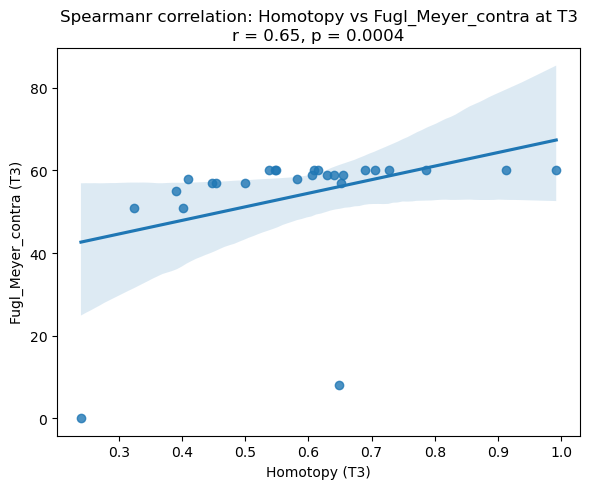

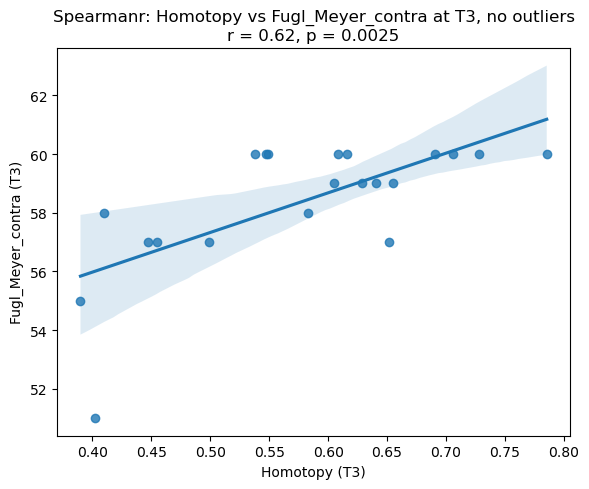

In [284]:
corr, pval = functions.metrics_correlation(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
)

## NMF T3 whole group spearman


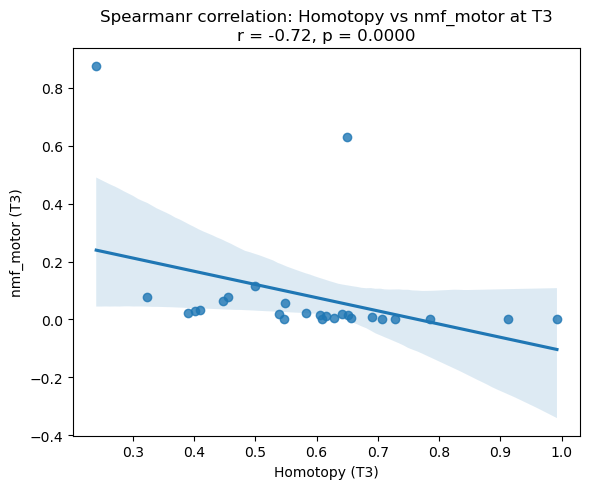

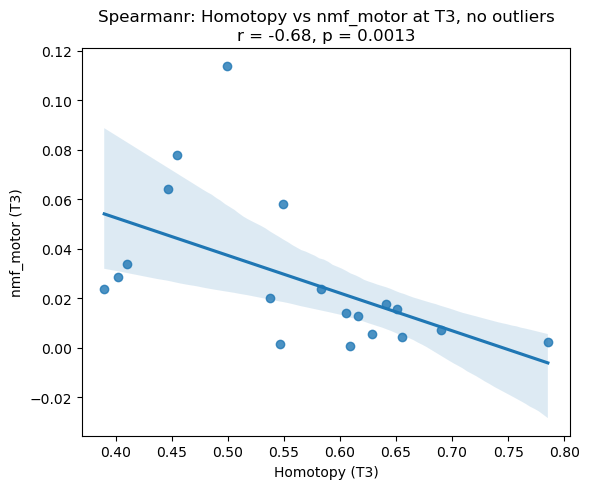

In [285]:
corr, pval = functions.metrics_correlation(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',  
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',  
    metric = 'Homotopy'
)

## FMC T4 whole group Spearman



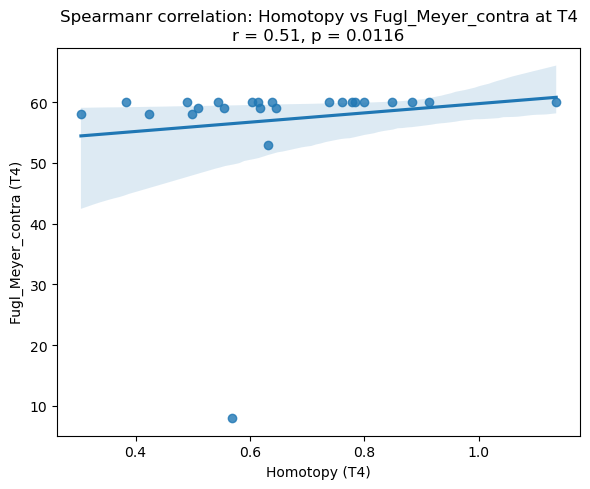

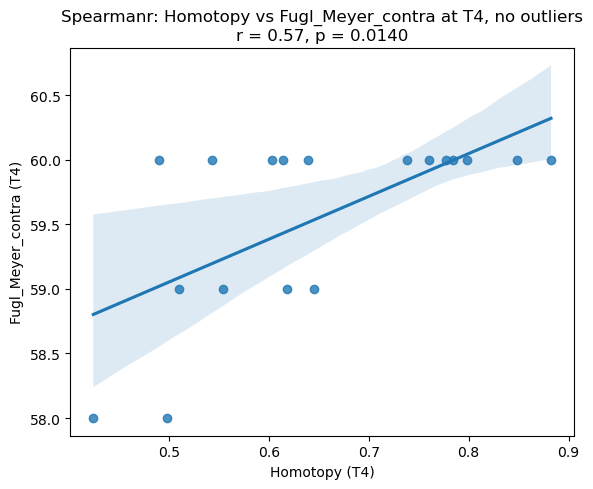

In [286]:
corr, pval = functions.metrics_correlation(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
)

## NFM T4 whole group Spearman

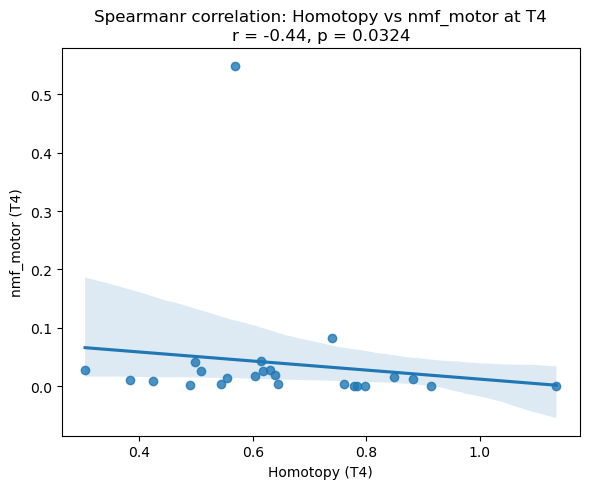

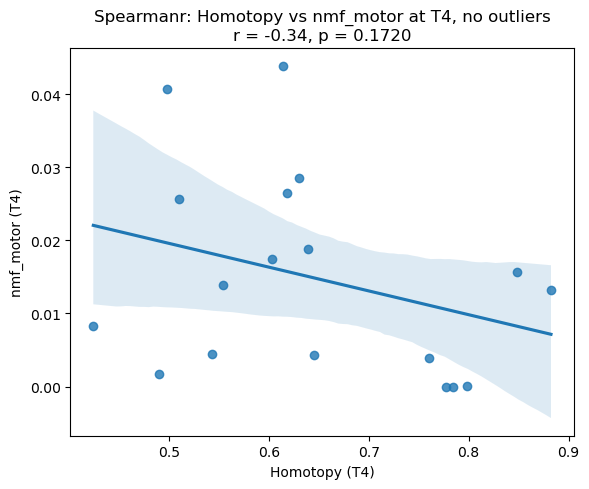

In [287]:
corr, pval = functions.metrics_correlation(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='nmf_motor',
    corr_type='spearmanr',  
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homotopic_t1_t3_t4_matched,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='nmf_motor',
    corr_type='spearmanr',  
    metric = 'Homotopy'
)

## FMC T3 R group Pearson


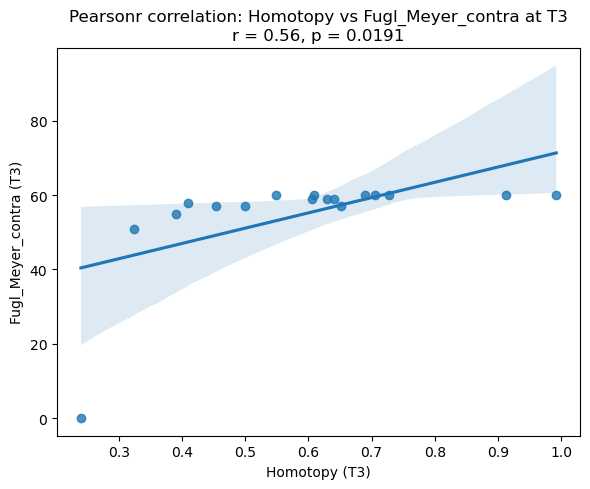

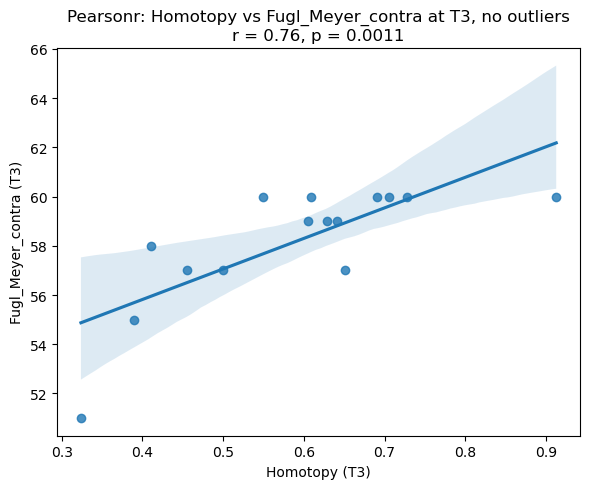

In [288]:
corr, pval = functions.metrics_correlation(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
    metric = 'Homotopy'
)

## NMF T3 R group Pearson


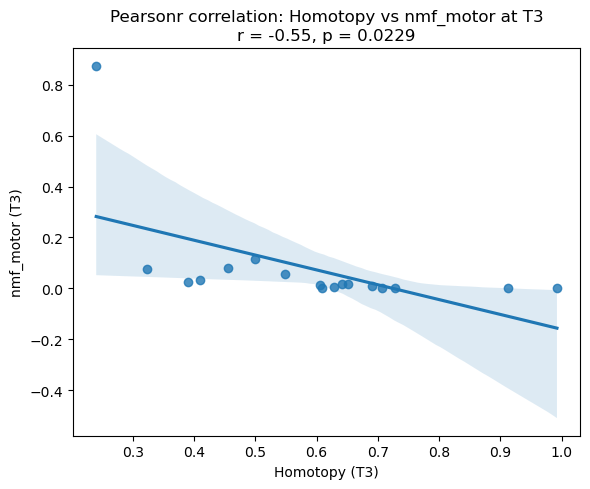

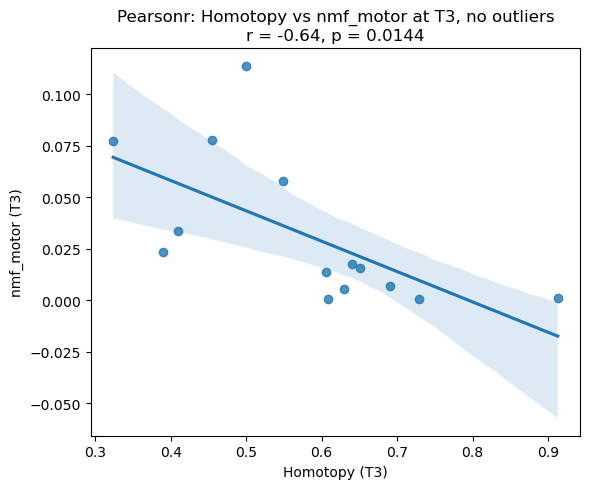

In [289]:
corr, pval = functions.metrics_correlation(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='pearsonr', 
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='pearsonr', 
    metric = 'Homotopy'
)

## FMC T3 R group Spearman


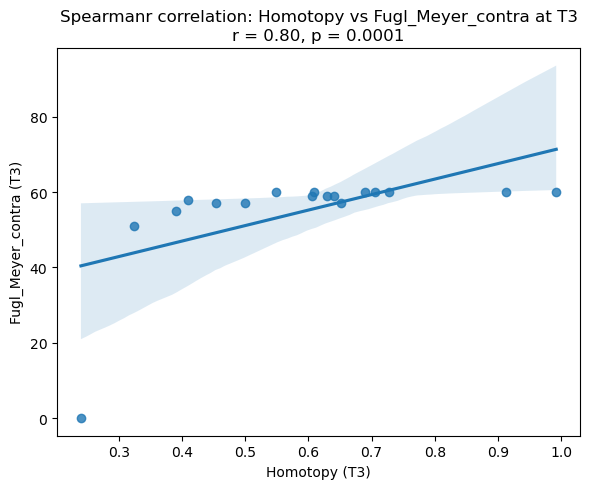

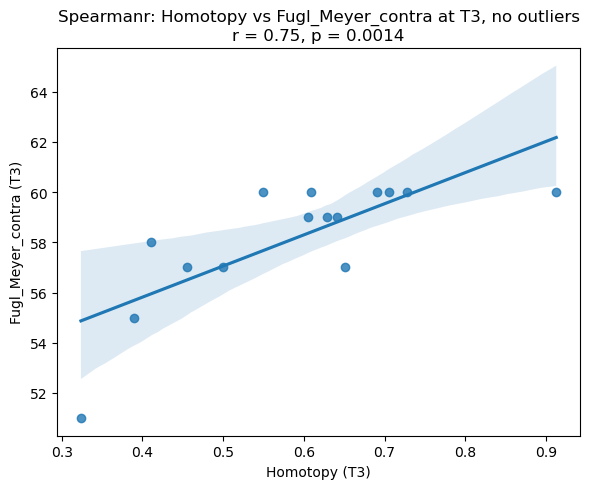

In [290]:
corr, pval = functions.metrics_correlation(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
)

## NMF T3 R group Spearman


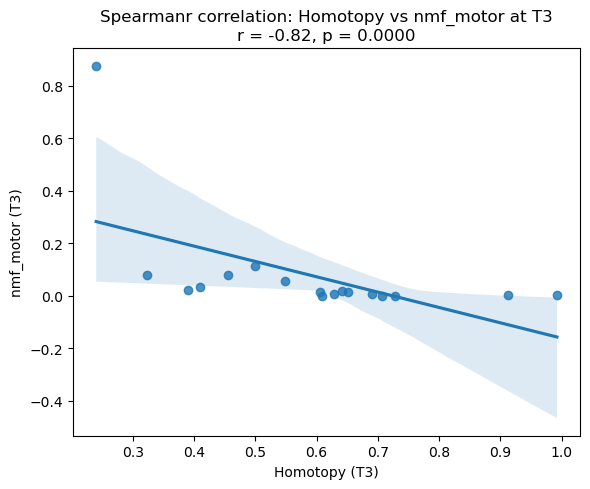

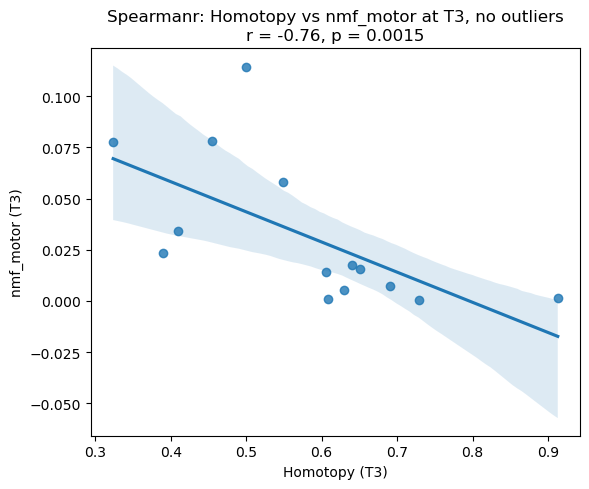

In [291]:
corr, pval = functions.metrics_correlation(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',  
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',  
    metric = 'Homotopy'
)

## FMC T4 R group Pearson


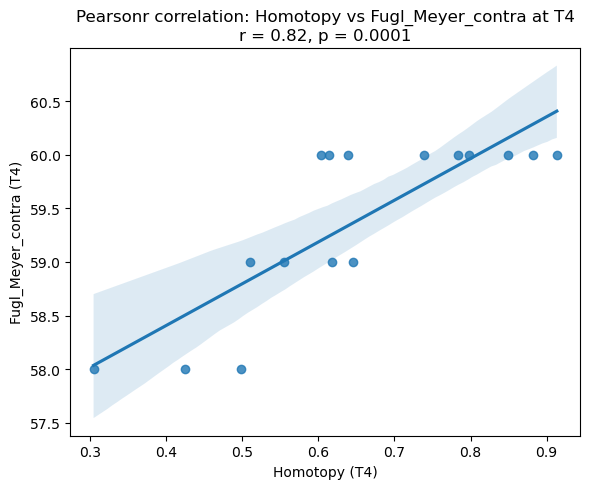

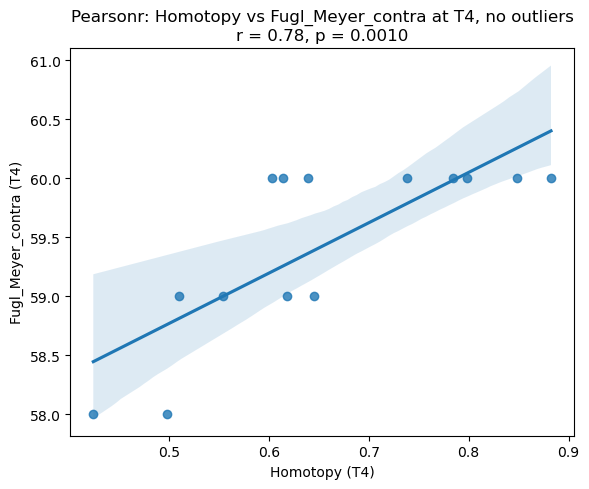

In [292]:
corr, pval = functions.metrics_correlation(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
    metric = 'Homotopy'
)

corr, pval = functions.metrics_correlation_cleaned(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
    metric = 'Homotopy'
)

## FMC T4 R group Spearman


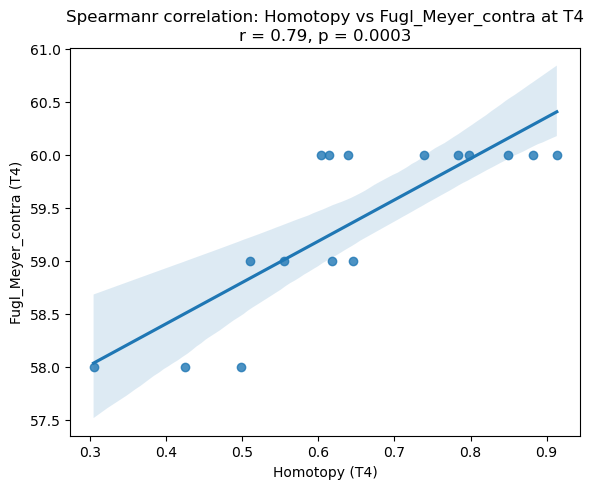

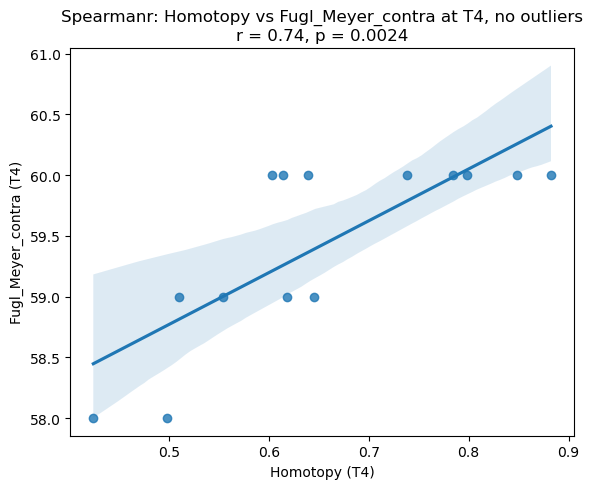

In [293]:
corr, pval = functions.metrics_correlation(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
    )

corr, pval = functions.metrics_correlation_cleaned(
    homo_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
    metric = 'Homotopy'
    )

# Modularity

FMI whole group T4 SPearman
FMC whole group T4 SPearman 

FMC R group T4 Pearson 
FMC R group T4 Spearman 



In [294]:
# Start with subject_id as a column, not an index
modularity_df = t1_t3_t4_matched[["subject_id"]].copy()
df_L, df_R = functions.split_by_lesion_side(t1_t3_t4_matched)

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in t1_t3_t4_matched.columns:
        modularity_df[tp] = t1_t3_t4_matched[tp].apply(functions.compute_modularity)

modularity_L = df_L[["subject_id"]].copy()

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in df_L.columns:
        modularity_L[tp] = df_L[tp].apply(functions.compute_modularity)

modularity_R = df_R[["subject_id"]].copy()

# Compute modularity for each timepoint and add to the new DataFrame
for tp in ['T1_matrix', 'T2_matrix', 'T3_matrix', 'T4_matrix']:
    if tp in df_R.columns:
        modularity_R[tp] = df_R[tp].apply(functions.compute_modularity)

## Whole group T4 FMI Spearman

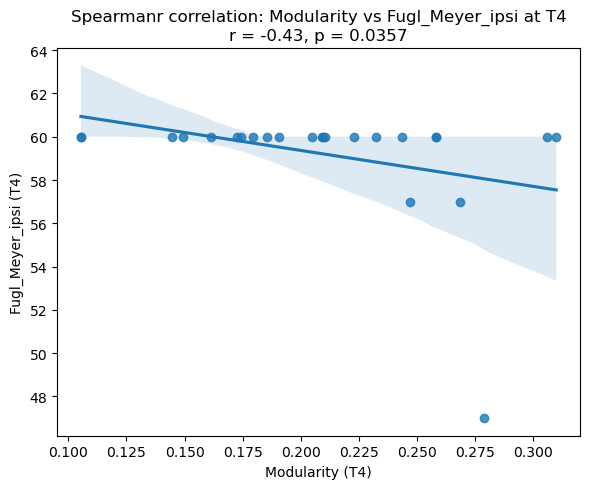

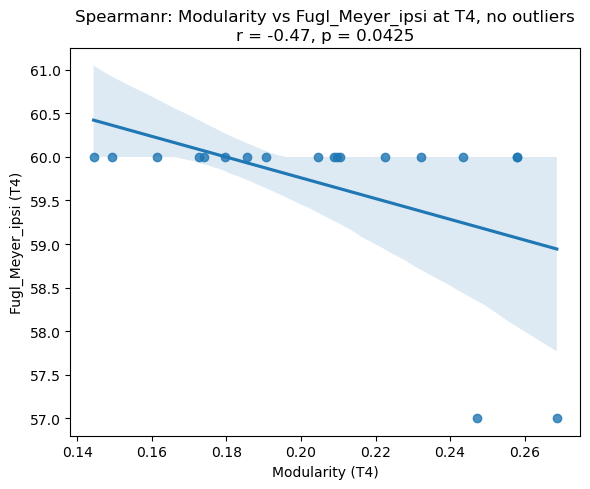

In [295]:
corr, pval = functions.metrics_correlation(
    modularity_df,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='spearmanr',  
)

corr, pval = functions.metrics_correlation_cleaned(
    modularity_df,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='spearmanr',  
)

## Whole group T4 FMC Spearman

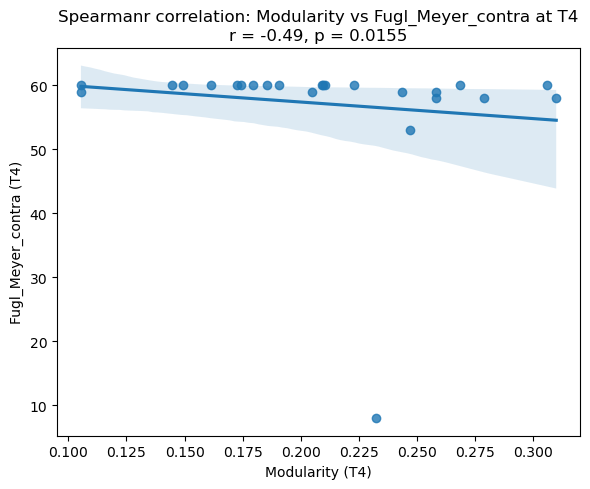

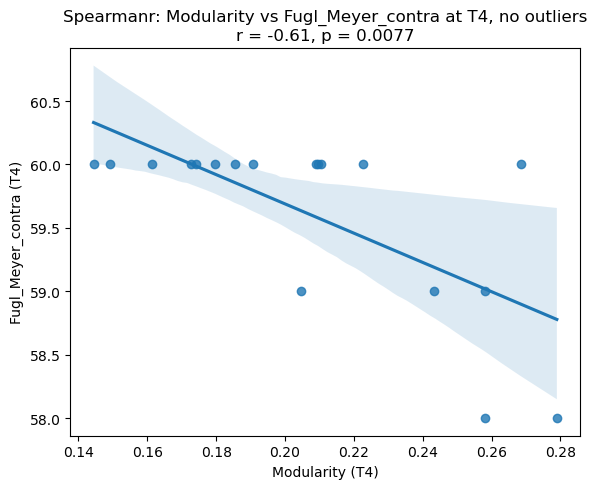

In [296]:
corr, pval = functions.metrics_correlation(
    modularity_df,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
)

corr, pval = functions.metrics_correlation_cleaned(
    modularity_df,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
)

## FMC R group T4 Pearson 

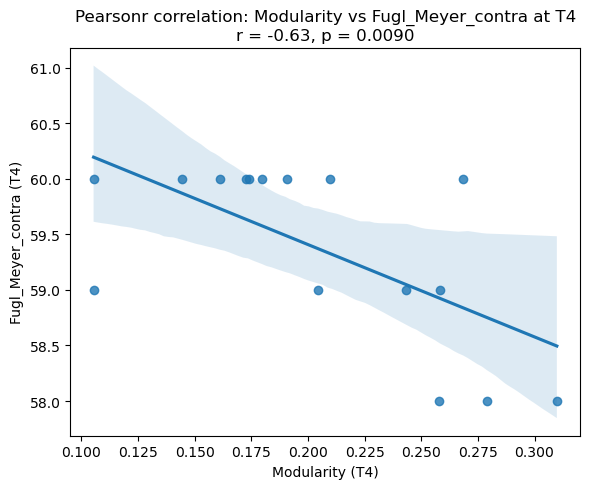

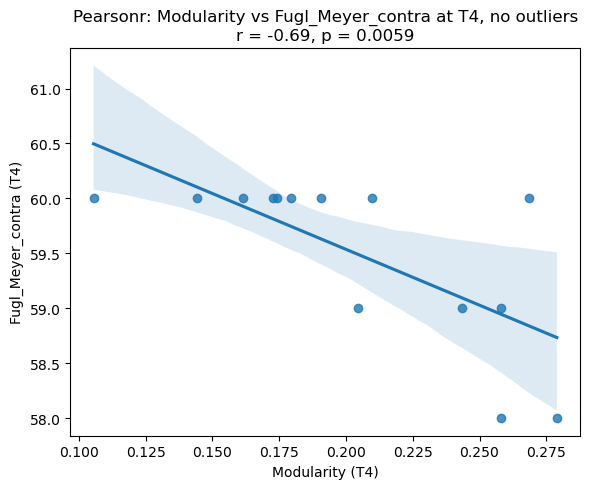

In [297]:
corr, pval = functions.metrics_correlation(
    modularity_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
)

corr, pval = functions.metrics_correlation_cleaned(
    modularity_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
)

## FMC R group T4 Spearman 

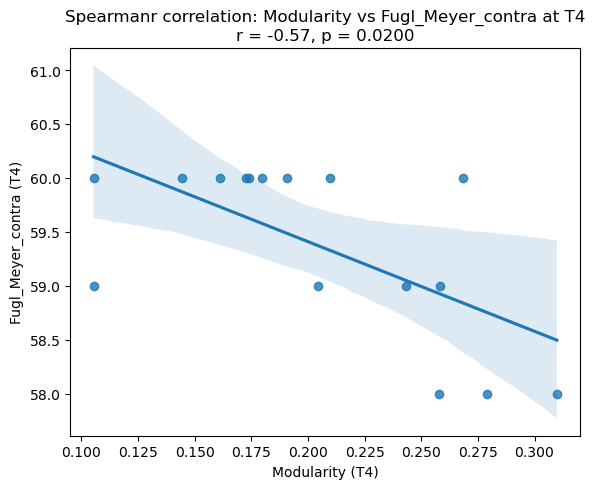

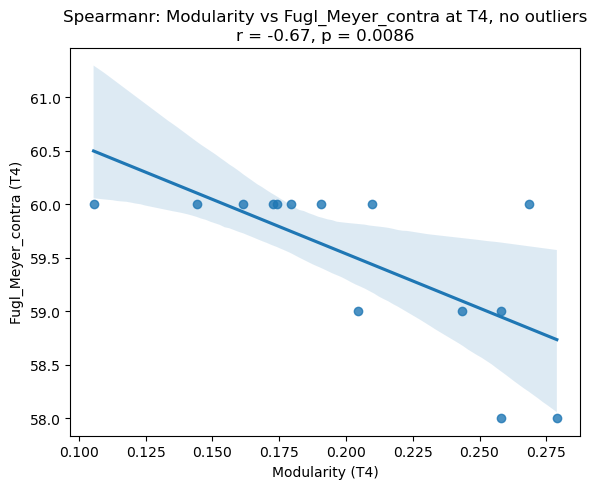

In [298]:
corr, pval = functions.metrics_correlation(
    modularity_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
)

corr, pval = functions.metrics_correlation_cleaned(
    modularity_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_contra',
    corr_type='spearmanr',
)

# Hemispheric symetry

rien !!!